# Quantum Computing Solution for Wordle using Bernstein-Vazirani Algorithm

Guess the WORDLE in six tries.

Each guess must be a valid five-letter word. Hit the enter button to submit.

After each guess, the color of the tiles will change to show how close your guess was to the word.

Examples

    
The letter W is in the word and in the correct spot.

The letter I is in the word but in the wrong spot.
    
The letter U is not in the word in any spot.

![Wordle](Capture.jpg)

###1.1 The Bernstein-Vazirani Problem <a id='bvproblem'> </a>

We are again given a black-box function $f$, which takes as input a string of bits ($x$), and returns either $0$ or $1$, that is:
$$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ where } x_n \textrm{ is }0 \textrm{ or } 1  $$ 

Instead of the function being balanced or constant as in the Deutsch-Josza problem, now the function is guaranteed to return the bitwise product of the input with some string, $s$. In other words, given an input $x$, $f(x) = s \cdot x \, \text{(mod 2)}$. We are expected to find $s$. As a classical reversible circuit, the Bernstein-Vazirani oracle looks like this:
    
![classical reversible circuit](bv2.svg)

## 3. Qiskit Implementation  <a id='implementation'></a>

We'll now walk through the solution of Wordle using Bernstein-Vazirani algorithm implementation in Qiskit 

In [74]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
# from qiskit import IBMQ, Aer
# from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

from qiskit.visualization import plot_histogram
from qiskit_aer import QasmSimulator



In [10]:
# function to convert integers from decimal to binary represntation 
def bin2int(bits):
    return np.right_shift(np.packbits(bits, -1), bits.size).squeeze()

In [50]:
word = "APPLE"
# create secret strings 
sec_strList = []
for letter in word:
    letASCII = ord(letter) -64
    secret_str = np.binary_repr(letASCII,width=5)
    sec_strList.append(secret_str)
print(sec_strList)

numQubits = (5+1)*5

['00001', '10000', '10000', '01100', '00101']


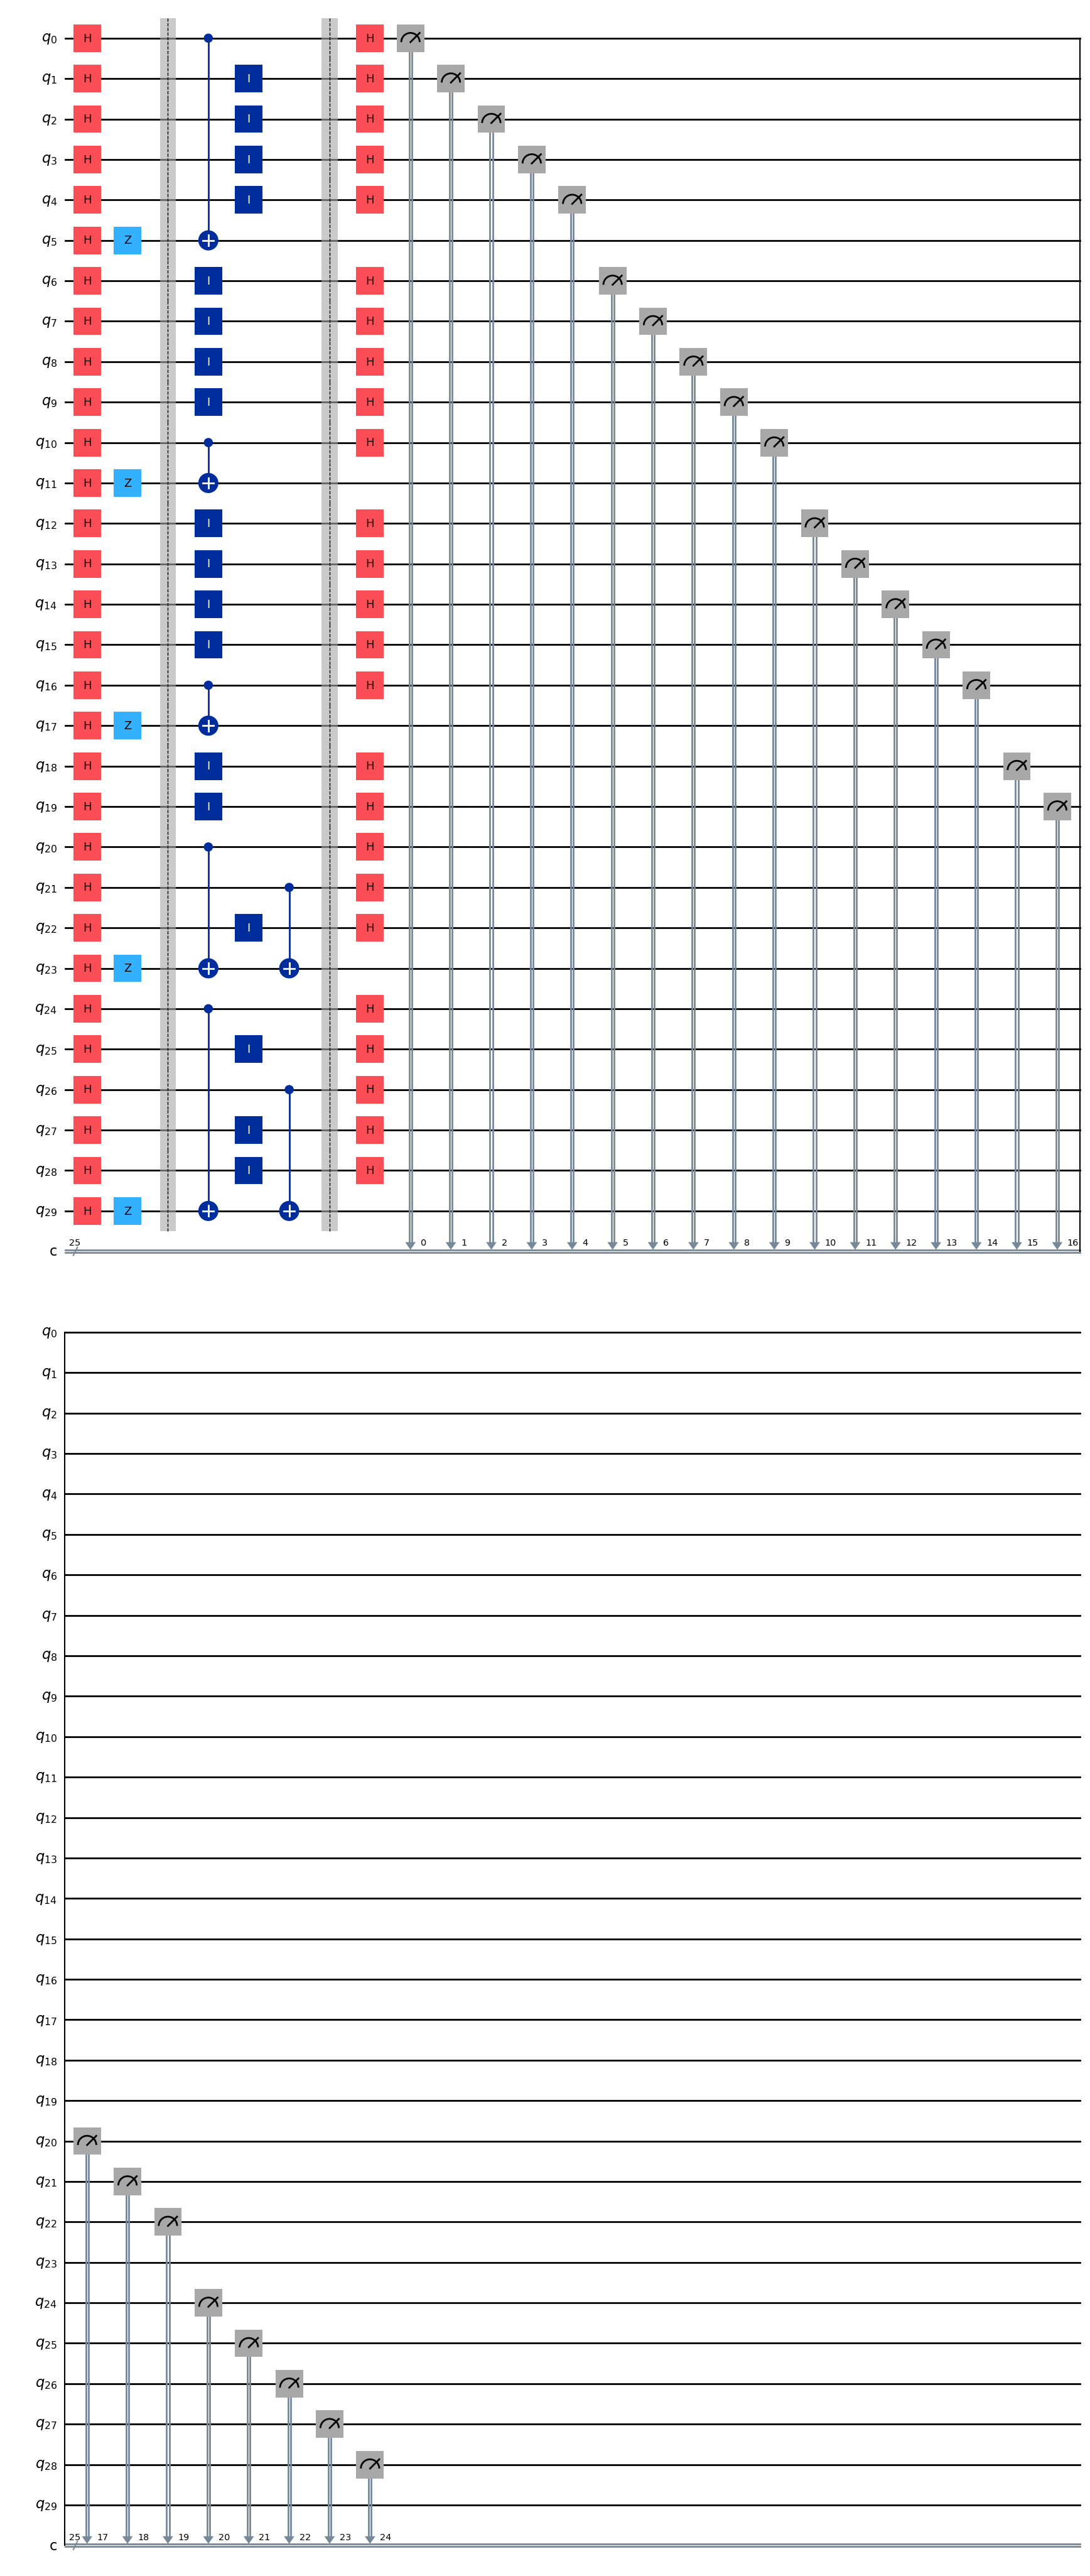

In [26]:
# We need a circuit with n qubits, plus one auxiliary qubit
# Also need n classical bits to write the output to
bv_circuit = QuantumCircuit(numQubits, 25)

for i in range(numQubits):
    if i%6==5:
        bv_circuit.h(i)
        bv_circuit.z(i)
    else:    
        bv_circuit.h(i)
    
# Apply barrier 
bv_circuit.barrier()

# Apply the inner-product oracle
let_index=0
for s in sec_strList:
    # print(s)
    s = s[::-1] # reverse s to fit qiskit's qubit ordering
    for q in range(5):
        if s[q] == '0':
            bv_circuit.id(let_index*6+q)
        else:
            bv_circuit.cx(let_index*6+q, let_index*6+5)
    let_index=let_index+1        
        
# Apply barrier 
bv_circuit.barrier()

j=0
for i in range(numQubits):
    if i%6!=5:  
        bv_circuit.h(i)
        bv_circuit.measure(i, j)
        j=j+1
        

# # Measurement
# for i in range(n):
#     bv_circuit.measure(i, i)

bv_circuit.draw('mpl')

### 3a. Experiment with Simulators  <a id='simulation'></a>

We can run the above circuit on the simulator. 

{'0x564201': 1024}


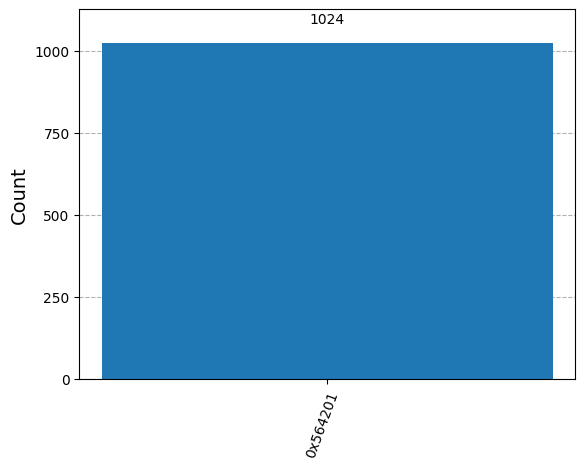

In [76]:
# use local simulator
simulator = QasmSimulator()
# Execute the circuit on the qasm simulator.    
result = simulator.run(bv_circuit).result()
# get the counts    
results = result.data()
answer = results['counts']
print(answer)
# plot the answer
plot_histogram(answer)
    


In [80]:
word = list(answer.keys())[0]
print(word)

binary_word = bin(int(word, 16))[2:].zfill(len(word) * 4)
binary_word = binary_word[-25:]
print("Binary word:", binary_word)

let_index = 0
ll = []
for i in range(5):
    letter = binary_word[i*5:i*5+5]
    let_index=let_index+1
    wlet = int(letter,2)
    ll.append(chr(wlet+64))
ll.reverse()
print('The word is ', ll)






0x564201
Binary word: 0010101100100001000000001
The word is  ['A', 'P', 'P', 'L', 'E']
